### Homework 9: Classification
#### Sahil Suresh (ss06192)
##### ss06192@st.habib.edu.pk

In [1]:
import pandas as pd
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dframe = pd.read_csv('CreditCardData.csv')

dframe = dframe.replace("?", np.nan)
dframe = dframe.dropna()

In [3]:
dframe["Approved"] = dframe["Approved"].replace(["+", "-"], ["1", "0"])

In [4]:
df = pd.get_dummies(dframe, columns = ['ZipCode','Male','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen'])
df

,Age,Debt,YearsEmployed,CreditScore,Income,Approved,ZipCode_0,ZipCode_100,ZipCode_102,ZipCode_108,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
0,30.83,0.000,1.25,1,0,Yes,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,560,Yes,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.5,0.500,1.50,0,824,Yes,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,3,Yes,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,0,Yes,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,No,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
686,22.67,0.750,2.00,2,394,No,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
687,25.25,13.500,2.00,1,1,No,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
688,17.92,0.205,0.04,0,750,No,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [5]:
X = df.drop(['Approved'],axis=1)
Y = df['Approved']
df.head()

,Age,Debt,YearsEmployed,CreditScore,Income,Approved,ZipCode_0,ZipCode_100,ZipCode_102,ZipCode_108,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
0,30.83,0.000,1.25,1,0,Yes,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,560,Yes,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.5,0.500,1.50,0,824,Yes,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,3,Yes,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,0,Yes,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)


dt = tree.DecisionTreeClassifier(random_state=99)
dtmodel = dt.fit(X_train, y_train)
##X_test has 30% data and X_train has 70% data


In [7]:
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [8]:
 
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

85.20408163265306

70% of the data is being used for training and we have 100% accuracy while training the model. Rest of the 30% of the data is being used for testing the model, which shows the accuracy of 85% to predict the valuse of approved column.

In the data we have alot of unsignificant attributes as we can see that the training accuracy is 100% whihc means that it is overfitting.

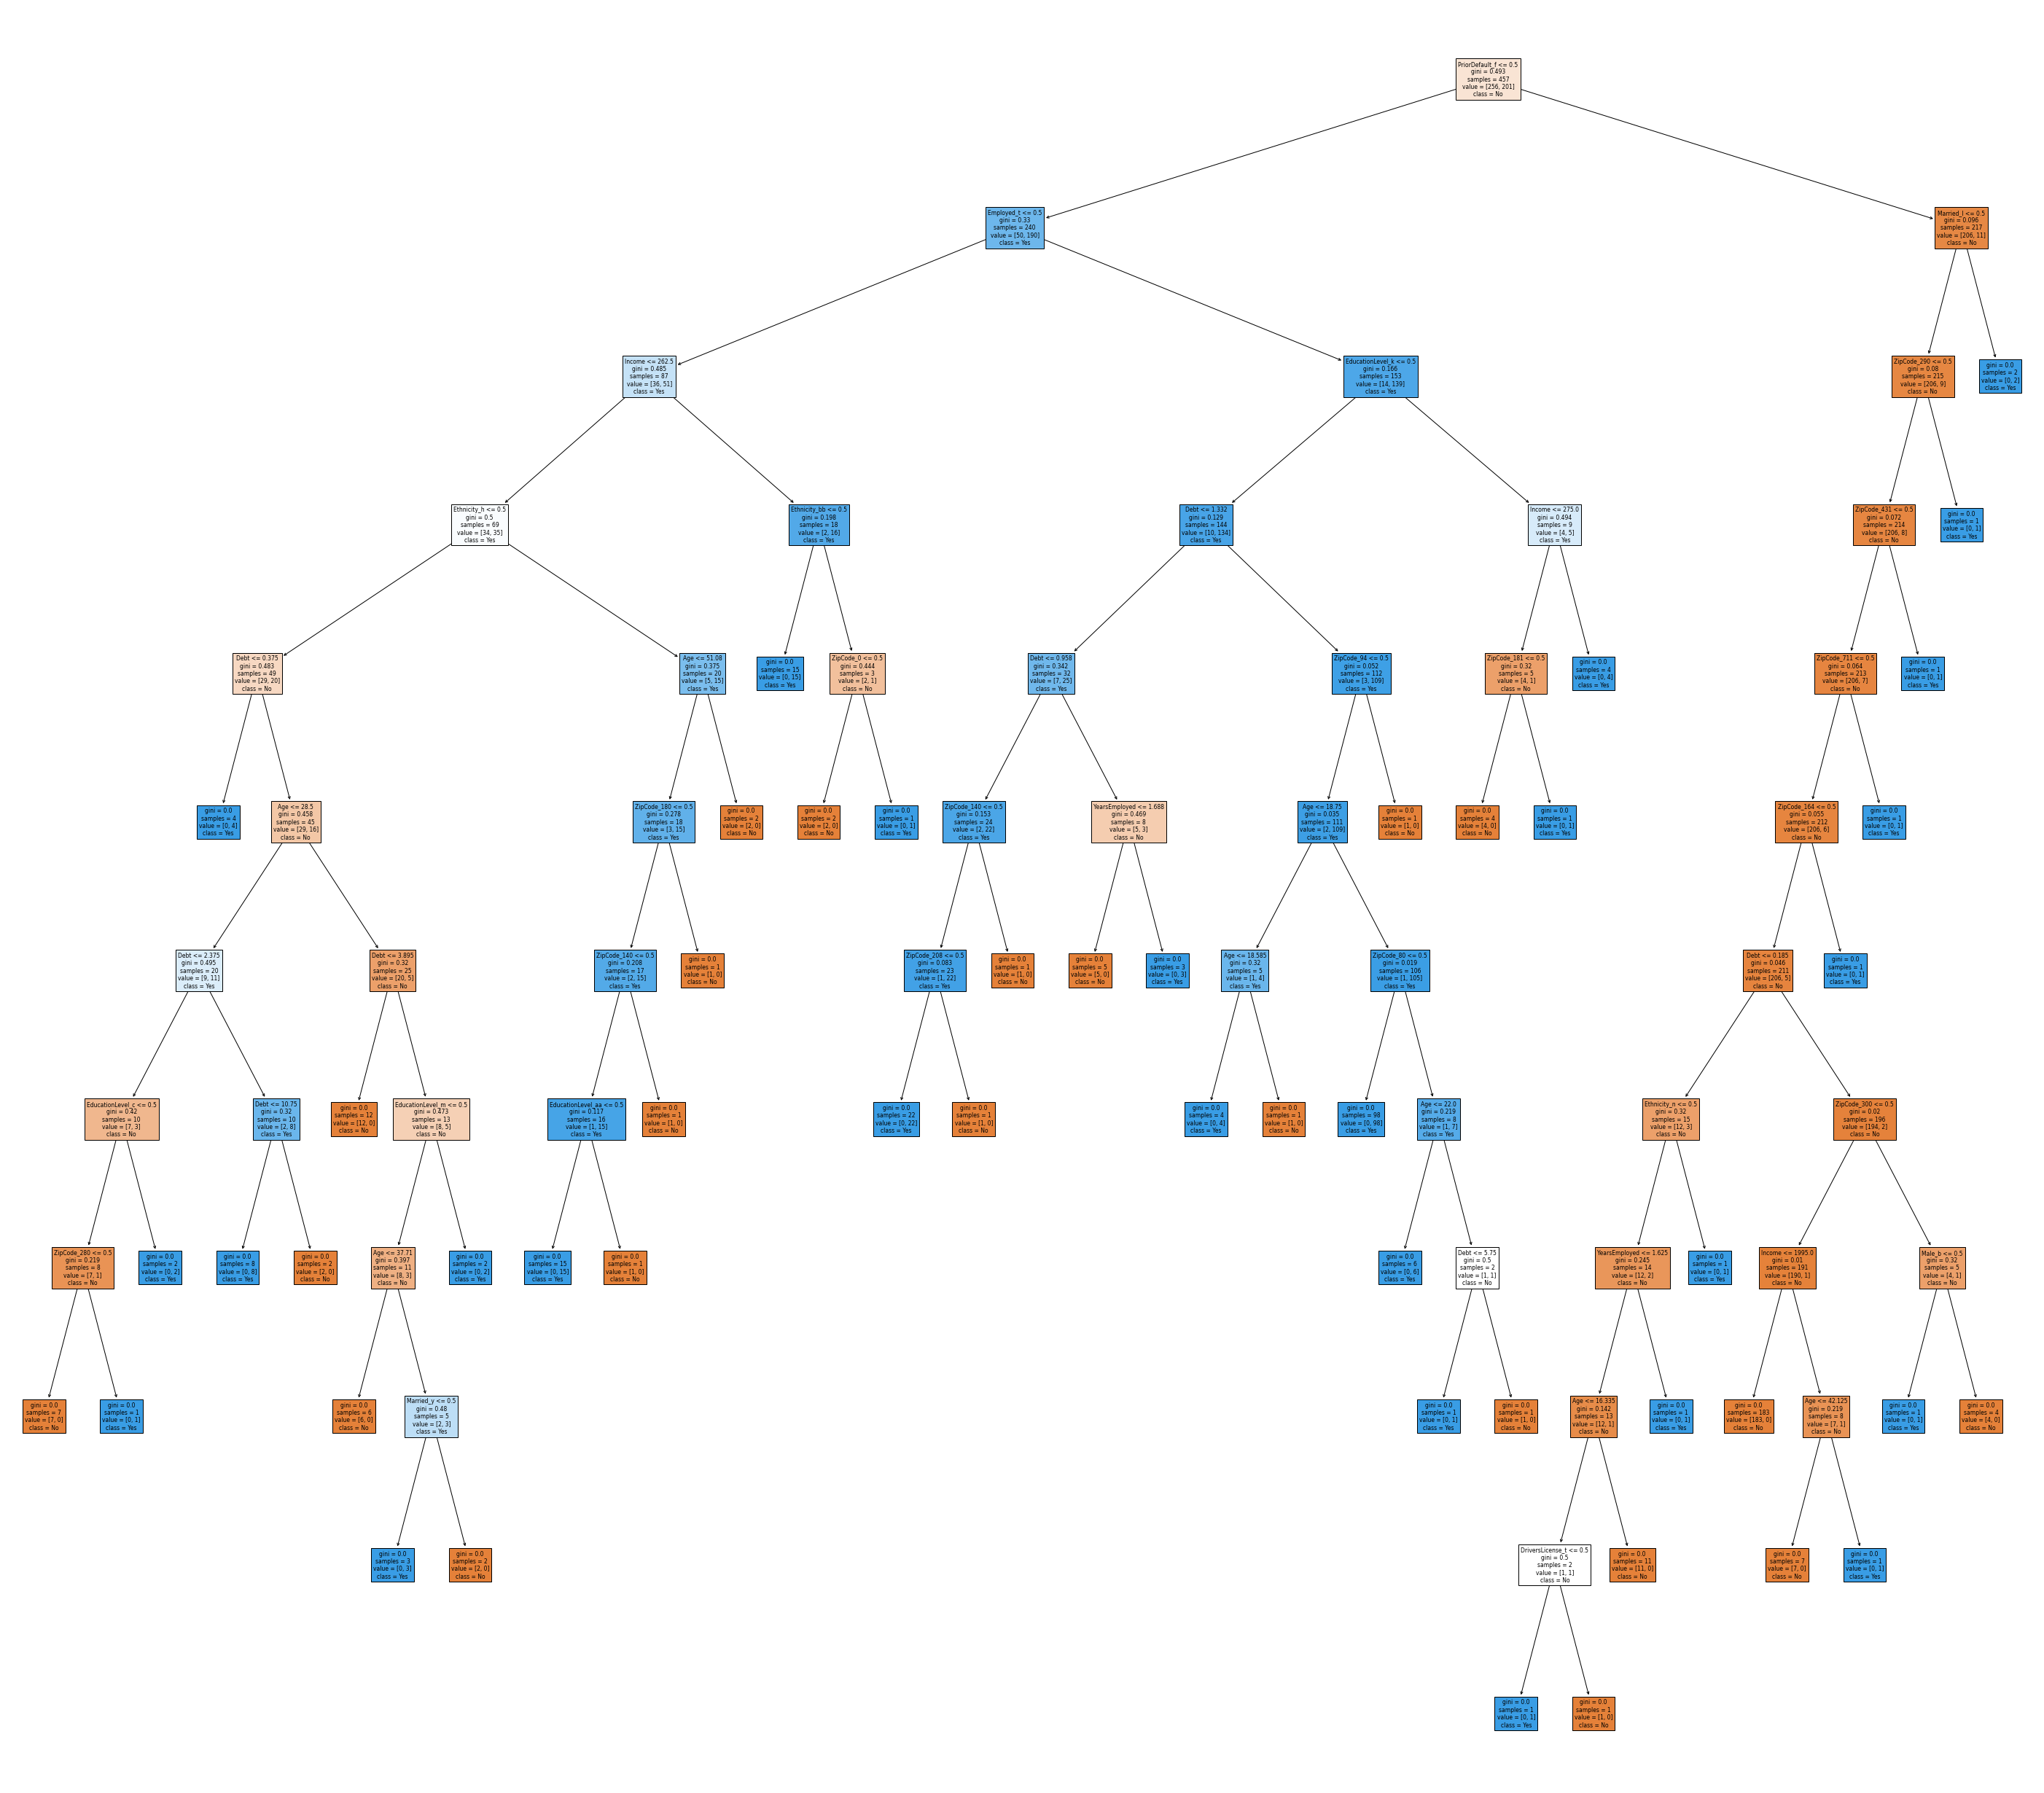

In [9]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [10]:
fig.savefig("decision_tree.png")

The most important attributes in the above tree before pruning are PriorDefault as it is the root node and as we go down the the attributes become less important. Debt/zip_code are the least important attributes.

Now we can reduce the overfitting by pruning the model and removing the less significant attributes (reducing the branches)

## Pruning the model

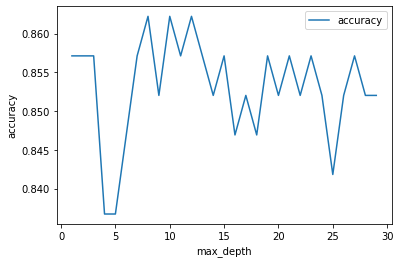

In [11]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [12]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=7) 
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100


96.2800875273523

In [13]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.22448979591837

After pruning we can see the small chnage in test accuracy and overfitting is also reduced. Pruning helped increasing the accuracy on test data. 

### Random Forest

### N_Estimator = 200

In [14]:
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=99)

rf = RandomForestClassifier(n_estimators=200)

In [15]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [16]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

87.75510204081633

For n_estimators = 200 the training accuracy is 100%, and the testing accuracy is 87.24%.

### N_Estimator = 150

In [17]:
rf = RandomForestClassifier(n_estimators=150)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [18]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

87.24489795918367

For n_estimators = 150 the training accuracy is 100%, and the testing accuracy is 87.24%.

### N_Estimator = 100

In [19]:
rf = RandomForestClassifier(n_estimators=100)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [20]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

85.71428571428571

### N_Estimator = 50

In [21]:
rf = RandomForestClassifier(n_estimators=50)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [22]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.73469387755102

For n_estimators = 50 the training accuracy is 100%, and the testing accuracy is 86.2244%.

### N_Estimator = 10

In [23]:
rf = RandomForestClassifier(n_estimators=10)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

98.90590809628009

In [24]:
test_pred1 = rfmodel.predict(X_test)
acc = accuracy_score(test_pred1, y_test)
acc*100

86.22448979591837

with less number of n-estimators the accuracy of test prediction lowers but the change is minute.

Further Analysis (N_estimator = 10)

C:\Users\Sahil Melwani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


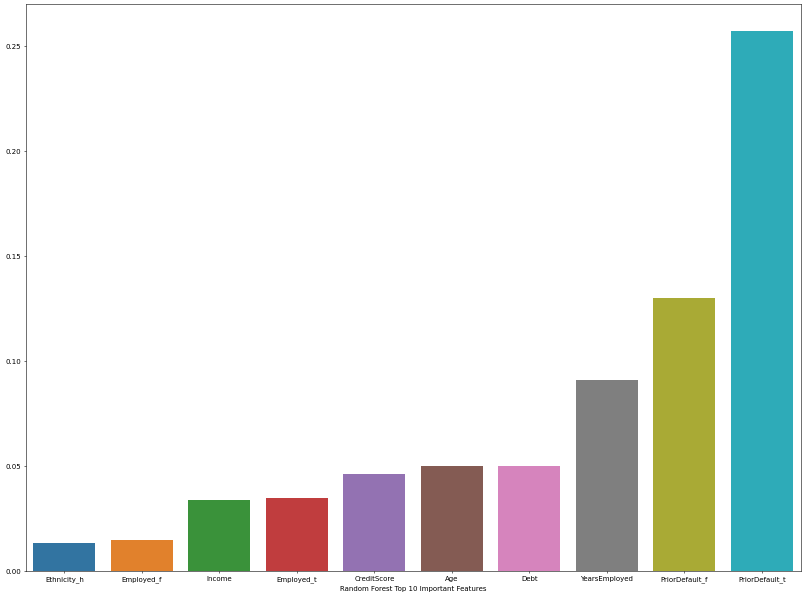

In [25]:
## Feature importance
sorted_idx = rfmodel.feature_importances_.argsort()[-10:]
plt.figure(num=None, figsize=(20,15), dpi=50, facecolor='w', edgecolor='r')
sns.barplot(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Top 10 Important Features")
plt.show()

The above bar graph shows that priordefault is the most important attribute.

#### Comparison between Decision Tree and RandomFores

##### Cross Validation:

In [26]:
## Decision Tree:
score = cross_val_score(dtmodel, X, Y, cv= 5)
score.mean()

0.8315678214914856

In [27]:
## Random forest tree
score = cross_val_score(rfmodel, X,Y,cv=5)
score.mean()

0.8315443335290664

The accuracy percenage of random forest is better than decision tree hence the random forest model is better than decision tree in terms of accuracy.

#### Confusion Matrix (cm)

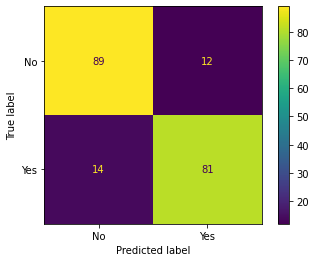

In [28]:
## Decision tree:
cm1 = confusion_matrix(y_test,test_pred)
cp = ConfusionMatrixDisplay(cm1,display_labels=dtmodel.classes_)
cp.plot()

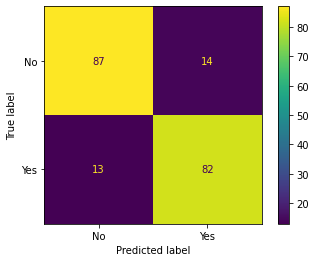

In [29]:
cm2 = confusion_matrix(y_test,test_pred1)
cp = ConfusionMatrixDisplay(cm2,display_labels=rfmodel.classes_)
cp.plot()

Random forest has greater number of correct predicted values than decision tree. Therefore, we can say that random forest is better model than decision tree model.

## Food Recommendation

In [30]:
df_food = pd.read_csv('mcdonalds.csv')
df_food

X = df_food.drop(['restaurant', 'item'], axis=1)
Y = df_food['item']

dt = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=99)

dtmodel2 = dt.fit(X, Y)

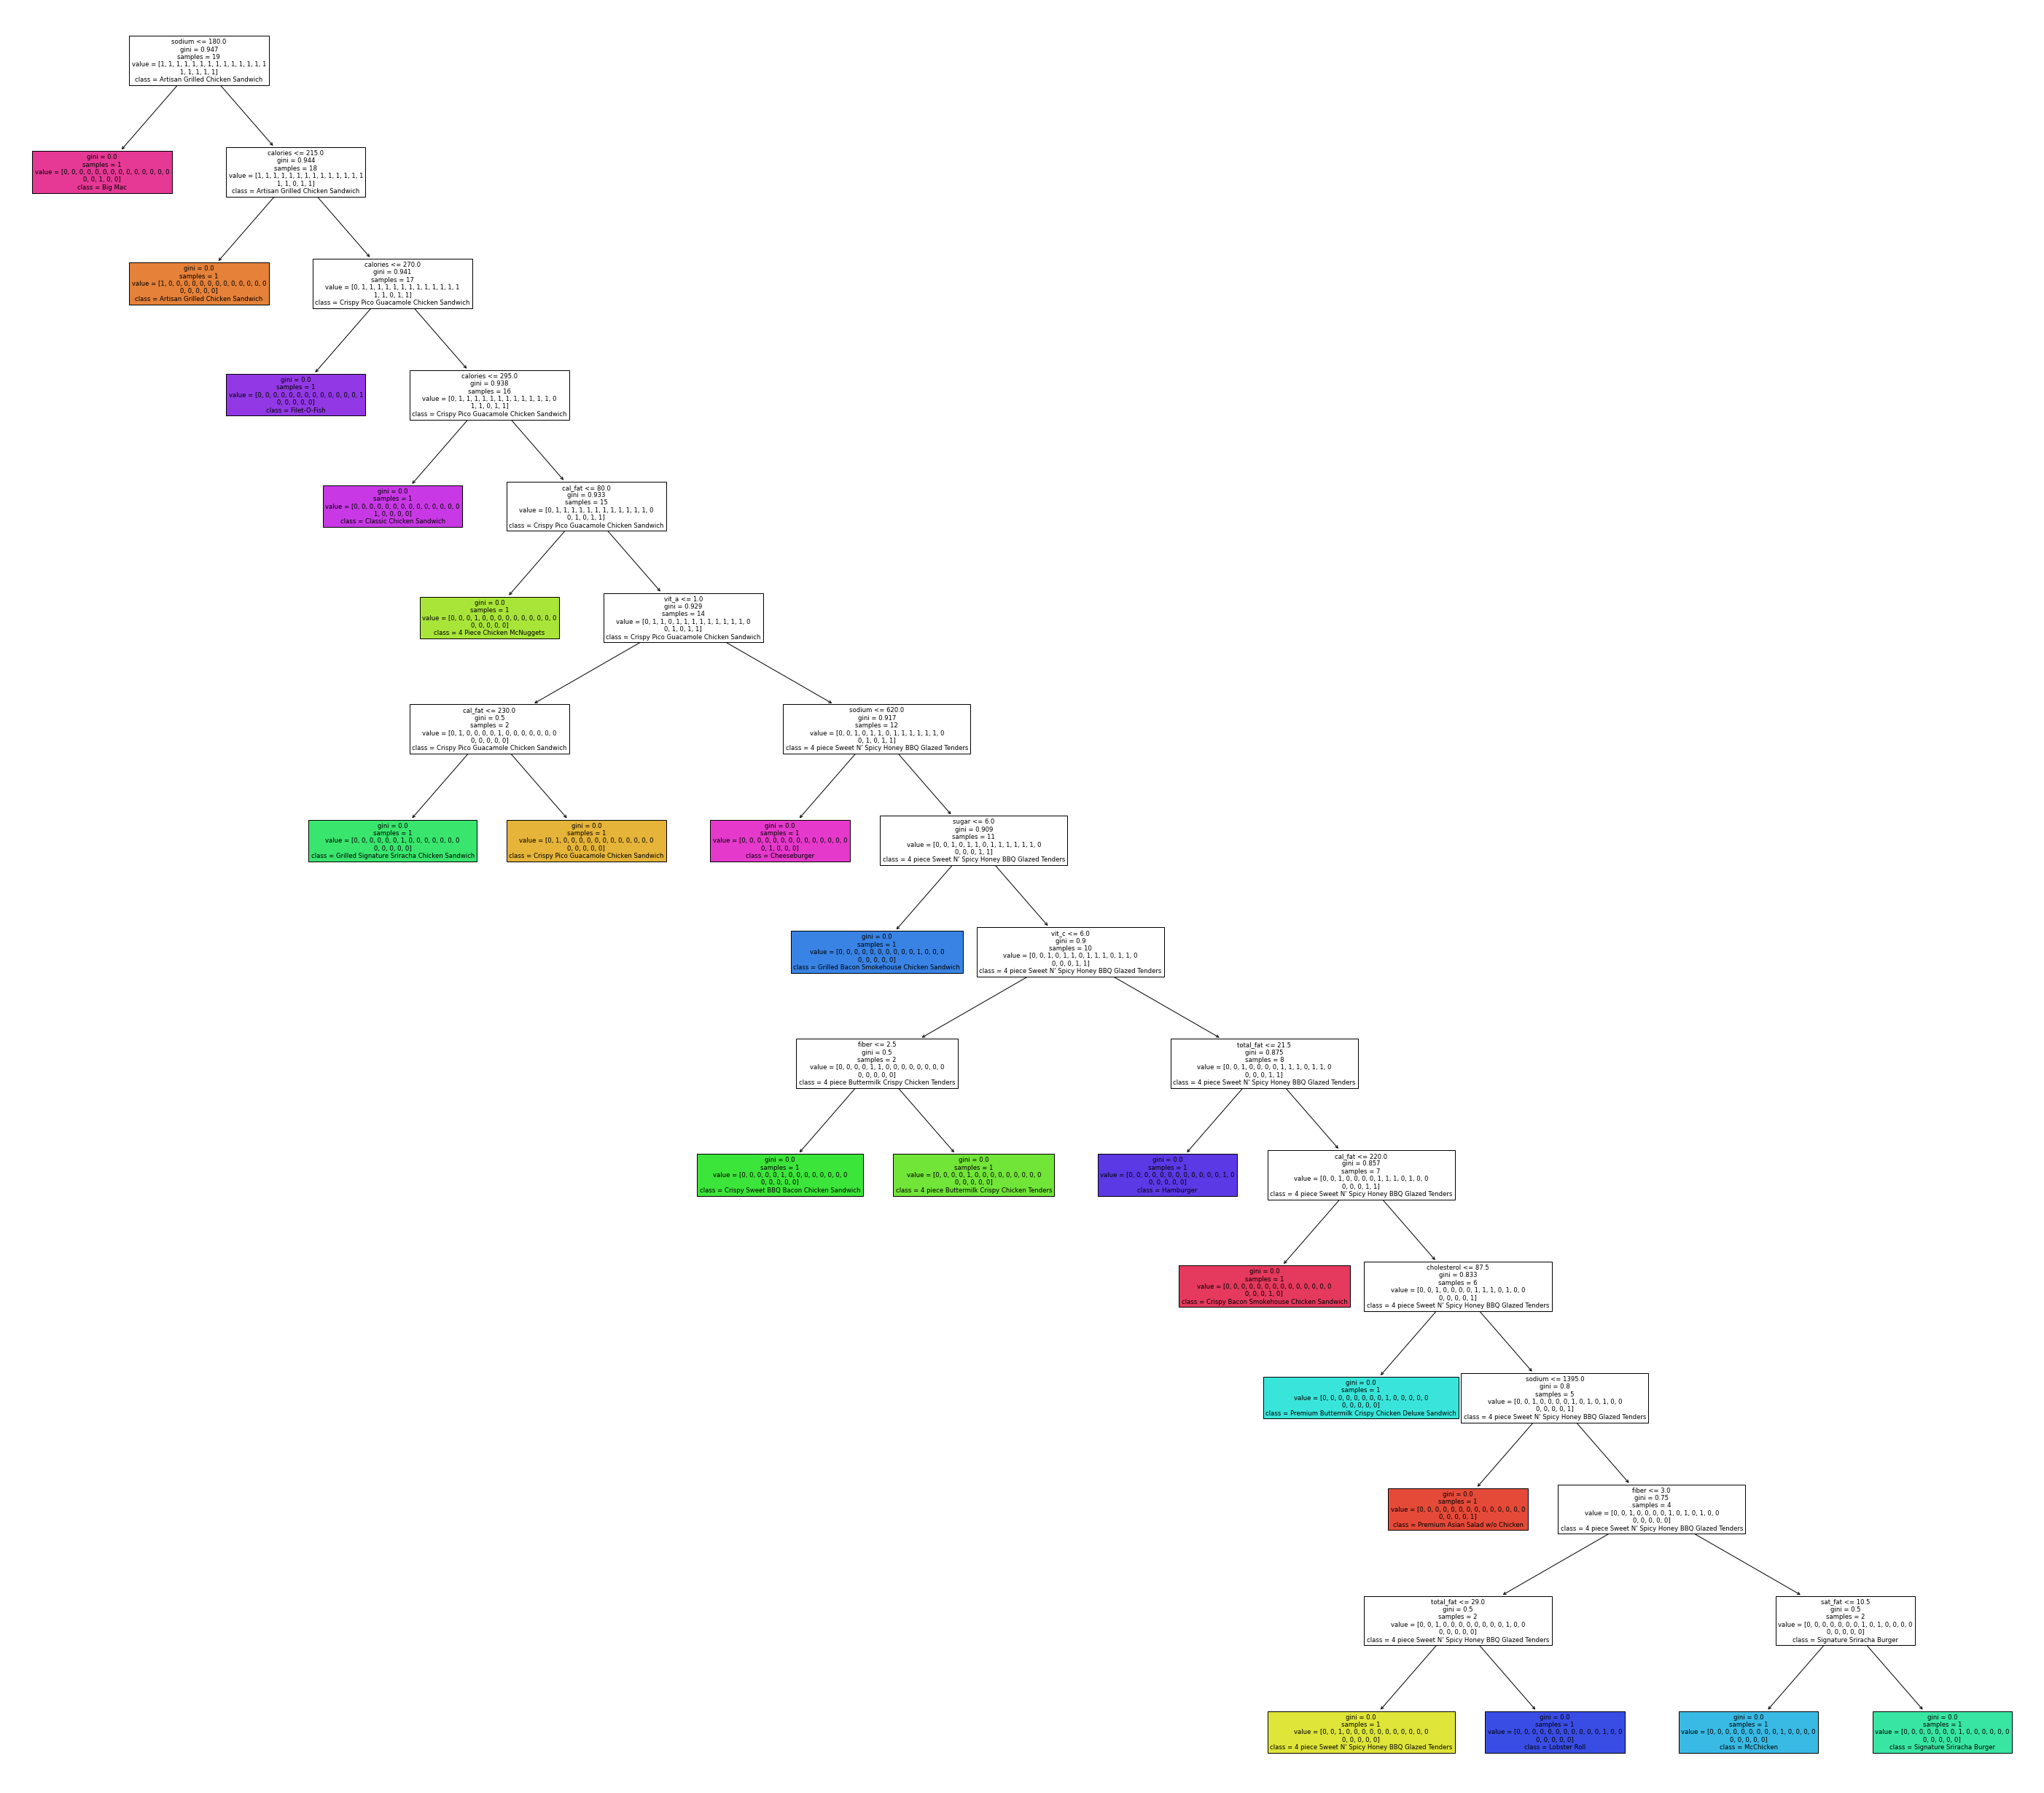

In [31]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel2, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [32]:
fig.savefig("decision_tree2.png")

In the above tree, we can see that Sodium is the root node which means it is the most significant attribute. Whereas, the least significant are total_fat, sat_fat, fiber. The amount of sodium is greater than 180 is Big Mac and all rest of items have sodium less than or equals to 180. The amount of calories are lesser in Crispy Pico Guacamole Chicken Sandwich than Artsian Grilled Chicken Sandwich. Similar interpretation can be made throughg the tree and thses can be used to predict an item. 